<a href="https://colab.research.google.com/github/AyeshaCrystal/https-colab.research.google.com-drive-1pFU4OMbl3SmVtRRVi3WJWDUsNhOdlv0r-usp-sharing/blob/main/Housing_Price_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries & Load Dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb

# Load dataset
df = pd.read_csv('/kaggle/Housing.csv')

Data Preprocessing

In [5]:
# Label Encoding for categorical variables
label_enc_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                  'airconditioning', 'prefarea', 'furnishingstatus']
le = LabelEncoder()
for col in label_enc_cols:
    df[col] = le.fit_transform(df[col])

# Features and target
X = df.drop('price', axis=1)
y = df['price']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Exploratory Data Analysis

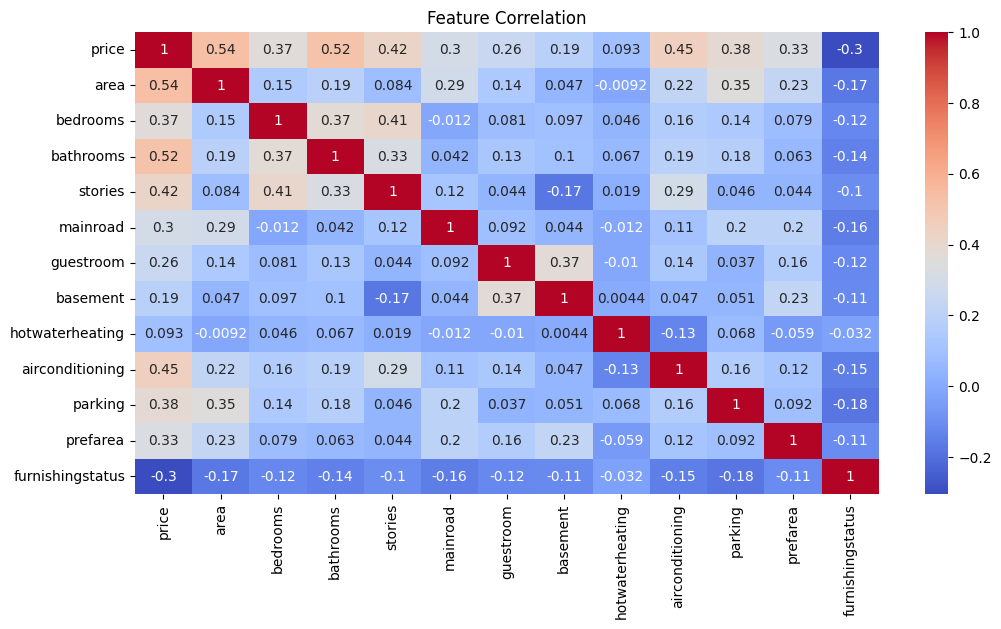

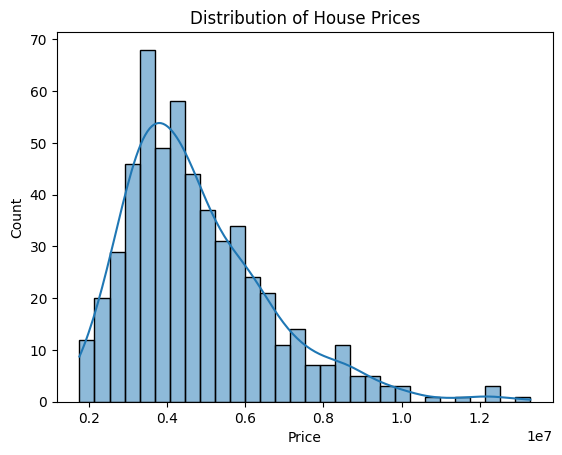

In [6]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

sns.histplot(df['price'], bins=30, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

Model Training & Evaluation

In [7]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    results[name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                            MAE          RMSE        R2
Linear Regression  9.796797e+05  1.331071e+06  0.649475
Ridge Regression   9.795083e+05  1.331263e+06  0.649374
Lasso Regression   9.796797e+05  1.331071e+06  0.649475
Random Forest      1.024279e+06  1.403586e+06  0.610243
XGBoost            1.062316e+06  1.425624e+06  0.597908


Visualize Model Performance

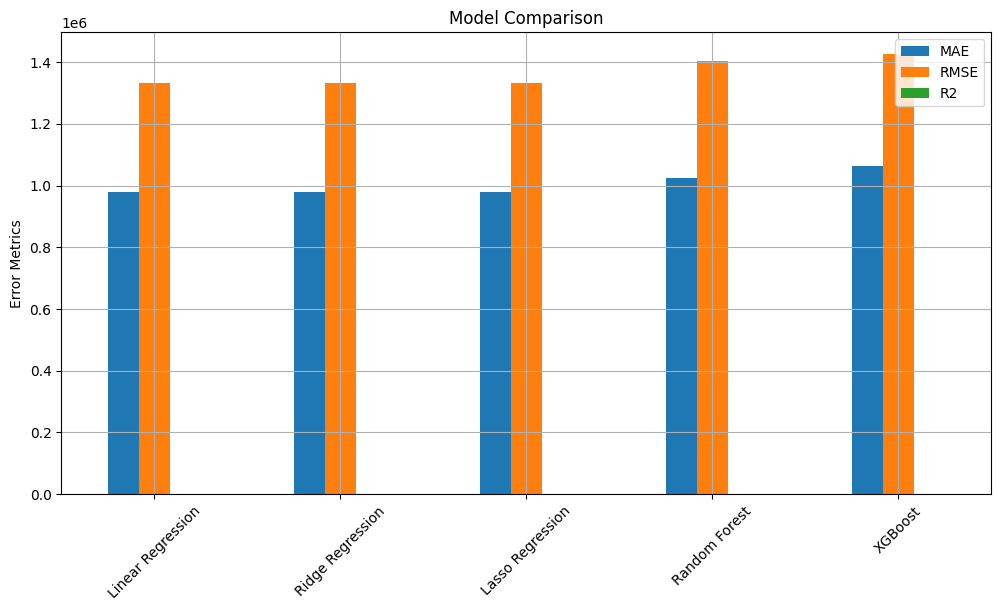

In [8]:
results_df.plot(kind='bar', figsize=(12,6))
plt.title("Model Comparison")
plt.ylabel("Error Metrics")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Feature Importance (XGBoost)

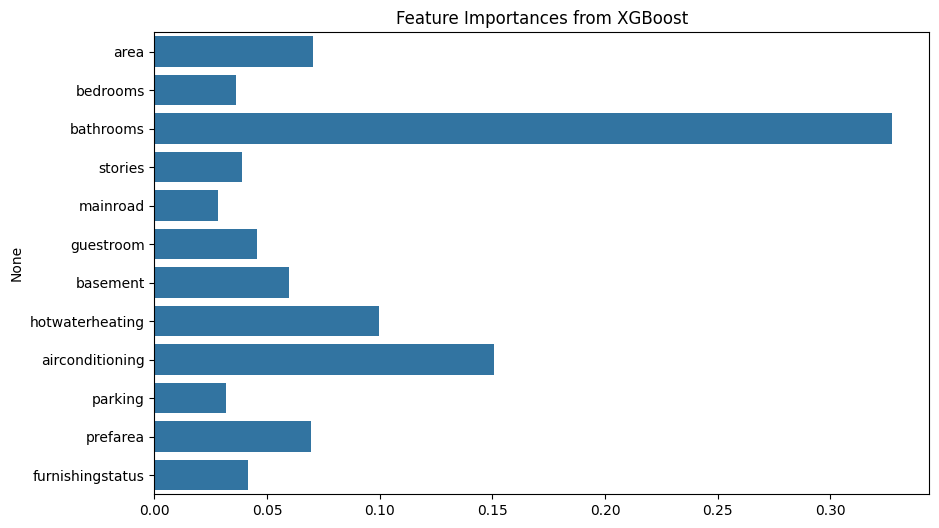

In [9]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_model.fit(X_train, y_train)

importances = xgb_model.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances from XGBoost")
plt.show()